# Hexatonic Collections

## Included Collections

- HEX<sub>0,1</sub> (<strong>P</strong>itch <strong>C</strong>lass C) in 1-3 ordering
- HEX<sub>1,2</sub> (<strong>PC</strong> C#) in 1-3 ordering
- HEX<sub>2,3</sub> (PC D) in 1-3 ordering
- HEX<sub>3,4</sub> (PC Eb) in 1-3 ordering
- HEX<sub>0,1</sub> (PC A) in 3-1 ordering ("Augmented Scale")
- HEX<sub>1,2</sub> (PC Bb) in 3-1 ordering ("Augmented Scale")
- HEX<sub>2,3</sub> (PC B) in 3-1 ordering ("Augmented Scale")
- HEX<sub>3,4</sub> (PC C) in 3-1 ordering ("Augmented Scale")

## Remaining Collections

- Prometheus Scale
- Blues Scale
- Tritone Scale

## Hexatonic Collections with their own Notebook

- Wholetone Scale

In [1]:
import music21

C Hexatonic collection in 3-1 ordering.


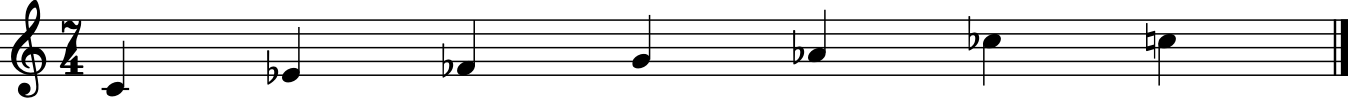

In [8]:
# Finding a time signature based upon a pitch class collection's length
# ----------------------------------------------------------------------


def find_time_signature(scale):
    """
    Finds the best fitting time signature of a given scale in a music21 
    stream.
    """
    scale_stream = scale.flat.notes
    m = music21.stream.Measure()
    [m.insert(i.offset, i) for i in scale_stream]

    return music21.meter.bestTimeSignature(m)

# Hexatonic Collections
# ----------------------------------------------------------------------
# Since there is no precooked hexatonic collection à la Straus in
# music21, we have to create a new scale network to create a hexatonic
# collection. HEX3,4 (starting in pitch class C) in 3-1 ordering is also
# known as the Augmented scale.


def get_hexatonic_collection(pc="C4", ordering="1-3"):
    """
    Builds a hexatonic collection based on a pitch center and either 1-3 
    or 3-1 ordering. The default pitch class for the pitch center in C4, 
    while the default ordering is 3-1.
    """
    # container for custom scale based on a pitch sequence model
    new_scale = music21.scale.AbstractScale()

    # deciding what ordering the new scale will have: 1-3 (default)
    # or 3-1
    if(ordering == '3-1'):
        new_scale.buildNetworkFromPitches(
            ["C#4", "E4", "F4", "G#4", "A4", "C5"])
    else:
        new_scale.buildNetworkFromPitches(
            ["C4", "C#4", "E4", "F4", "G#4", "A4"])

    # creating a hexatonic collection based on a given pitch center
    hex_col = new_scale._net.realizePitch(pc)

    # opening a stream to hold a hexatonic collection
    hexatonic_collection = music21.stream.Stream()

    # filling the stream with pitch class
    [hexatonic_collection.append(music21.note.Note(p)) for p in hex_col]

    # creating a time signature based on the length of the scale
    hexatonic_collection.insert(0,
                                find_time_signature(hexatonic_collection))

    # pretty print label
    print(music21.note.Note(pc).name +
          " Hexatonic collection in " + ordering + " ordering.")

    # showing the hexatonic collection on a staff
    hexatonic_collection.show()

    # listening to the hexatonic collection
    # hexatonic_collection.show('midi')


# showing a hexatonic collection based on pitch center and ordering
get_hexatonic_collection('C4', '3-1')
